In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import Dataset

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [42]:
IceCream["Revenue"]

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [4]:
IceCream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Data Visualization 

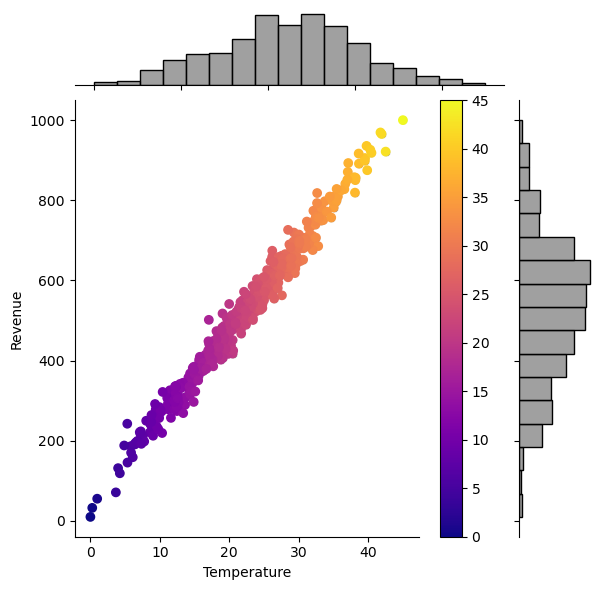

In [79]:
joint_plot = sns.jointplot( x = "Temperature" , y = "Revenue", data = IceCream, color = "grey")
scatter = plt.scatter(IceCream["Temperature"], IceCream["Revenue"], c=IceCream["Temperature"], cmap="plasma")
plt.colorbar(scatter)
plt.show()

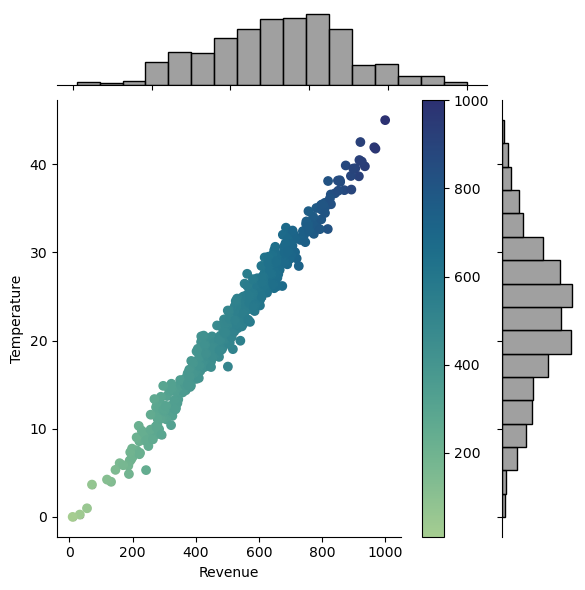

In [16]:
joint_plot = sns.jointplot( x = "Revenue" , y = "Temperature", data = IceCream, color = "grey")
scatter = plt.scatter(IceCream["Revenue"], IceCream["Temperature"], c=IceCream["Revenue"], cmap="crest")
plt.colorbar(scatter)
plt.show()

[]

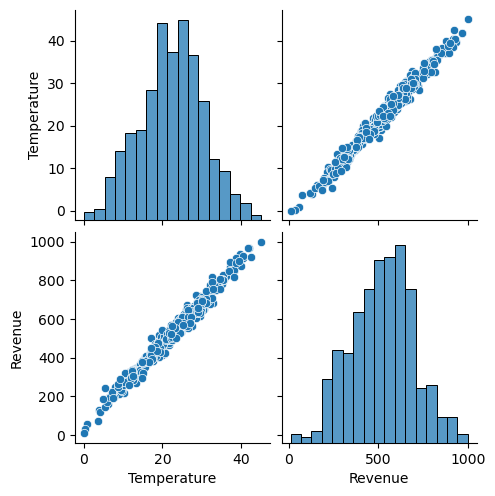

In [19]:
sns.pairplot(data = IceCream )
plt.plot()

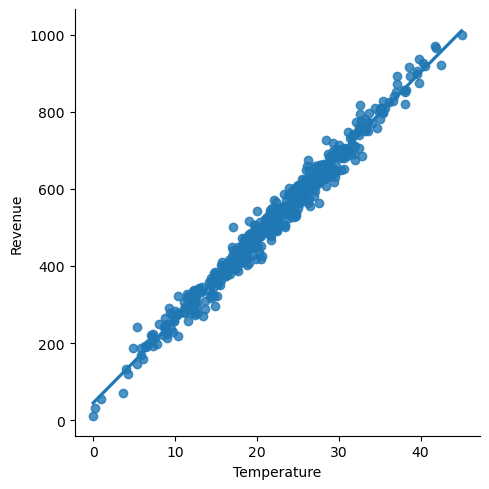

In [27]:
sns.lmplot(x = "Temperature", y = "Revenue", data = IceCream)
plt.show()

## Training and Testing

In [49]:
# Creates a DataFrame, which is more suitable for many machine learning algorithms.
X = IceCream[['Temperature']] 

X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [50]:
y = IceCream['Revenue']
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [60]:
X_train.shape

(400, 1)

In [61]:
y_train.shape

(400,)

## Training 


In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
print("Linear Coefficient (m)", regressor.coef_)
print("Linear Model Coefficient (b)", regressor.intercept_)

Linear Coefficient (m) [21.38197386]
Linear Model Coefficient (b) 46.80464127742357


## Testing


In [99]:
X_test.shape


(100, 1)

In [100]:
y_predict = regressor.predict(X_test)
y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Training set)')

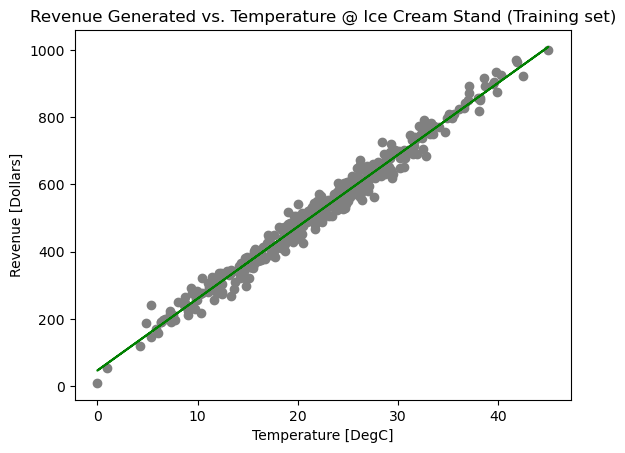

In [101]:
plt.scatter(X_train, y_train, color = "gray")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.ylabel("Revenue [Dollars]")
plt.xlabel("Temperature [DegC]")
plt.title("Revenue Generated vs. Temperature @ Ice Cream Stand (Training set)")

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Test set)')

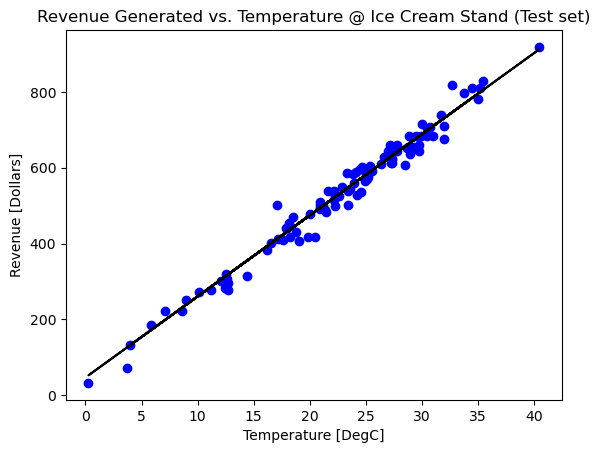

In [115]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_predict, color = "black")
plt.ylabel("Revenue [Dollars]")
plt.xlabel("Temperature [DegC]")
plt.title("Revenue Generated vs. Temperature @ Ice Cream Stand (Test set)")

C:\Users\hadut\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


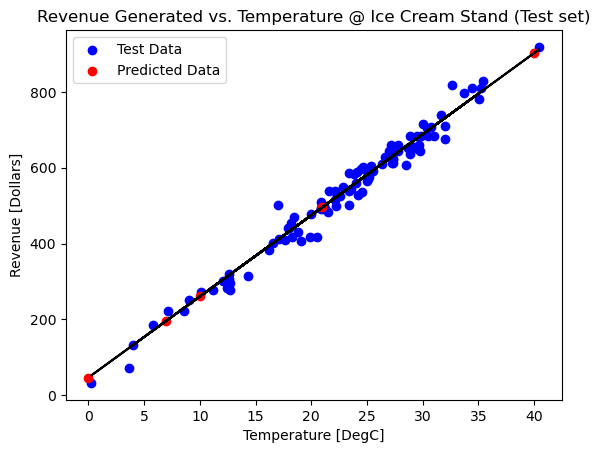

In [126]:
temperatures_to_predict = np.array([10, 21, 40, 0, 7]).reshape(-1, 1)

predicted_revenue = regressor.predict(temperatures_to_predict)

plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.scatter(temperatures_to_predict, predicted_revenue, color="red", label="Predicted Data")
plt.plot(X_test, regressor.predict(X_test), color="black")
plt.ylabel("Revenue [Dollars]")
plt.xlabel("Temperature [DegC]")
plt.title("Revenue Generated vs. Temperature @ Ice Cream Stand (Test set)")
plt.legend(loc="upper left")
plt.show()